# Unsupervised Learning with Clustering Methods

Perform customers segmentation such that we could refine and recommend our products based on the preferences of specific customer segments.

Instead of marketing a new product to the entire customer base, we could focus on identifying segments that are most likely to show interest. By directing targeted marketing efforts toward these specific groups, we could use resources more efficiently and improve the chances of successful product adoption.

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
data = pd.read_csv("data/processed_data.csv")

X = data[['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Customer_Tenure_Days', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'Purchases_Amount', 'Purchases_Number']]

In [3]:
categorical_features = ['Education', 'Marital_Status']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [4]:
X.head(5)

,Age,Income,Kidhome,Teenhome,Customer_Tenure_Days,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,68,58138.0,0,0,4632,58,635,88,546,172,...,True,False,False,False,False,False,True,False,False,False
1,71,46344.0,1,1,4082,38,11,1,6,2,...,True,False,False,False,False,False,True,False,False,False
2,60,71613.0,0,0,4281,26,426,49,127,111,...,True,False,False,False,False,False,False,True,False,False
3,41,26646.0,1,0,4108,26,11,4,20,10,...,True,False,False,False,False,False,False,True,False,False
4,44,58293.0,1,0,4130,94,173,43,118,46,...,False,False,True,False,False,True,False,False,False,False


In [7]:
# remove outliers based on income
X = X[X['Income'] < 110000]

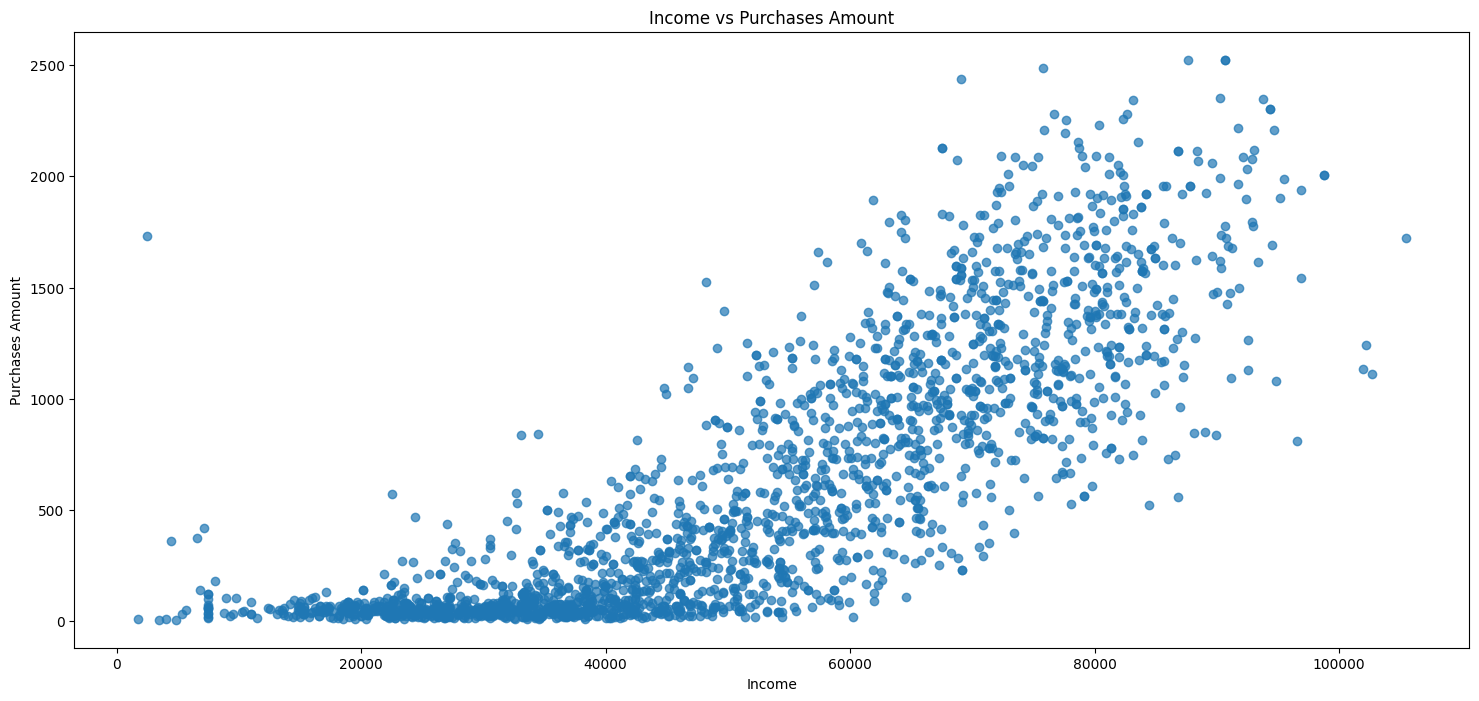

In [12]:
plt.figure(figsize=(18, 8))

plt.scatter(X['Income'], X['Purchases_Amount'], alpha=0.7)
plt.title('Income vs Purchases Amount')
plt.xlabel('Income')
plt.ylabel('Purchases Amount')
plt.show()

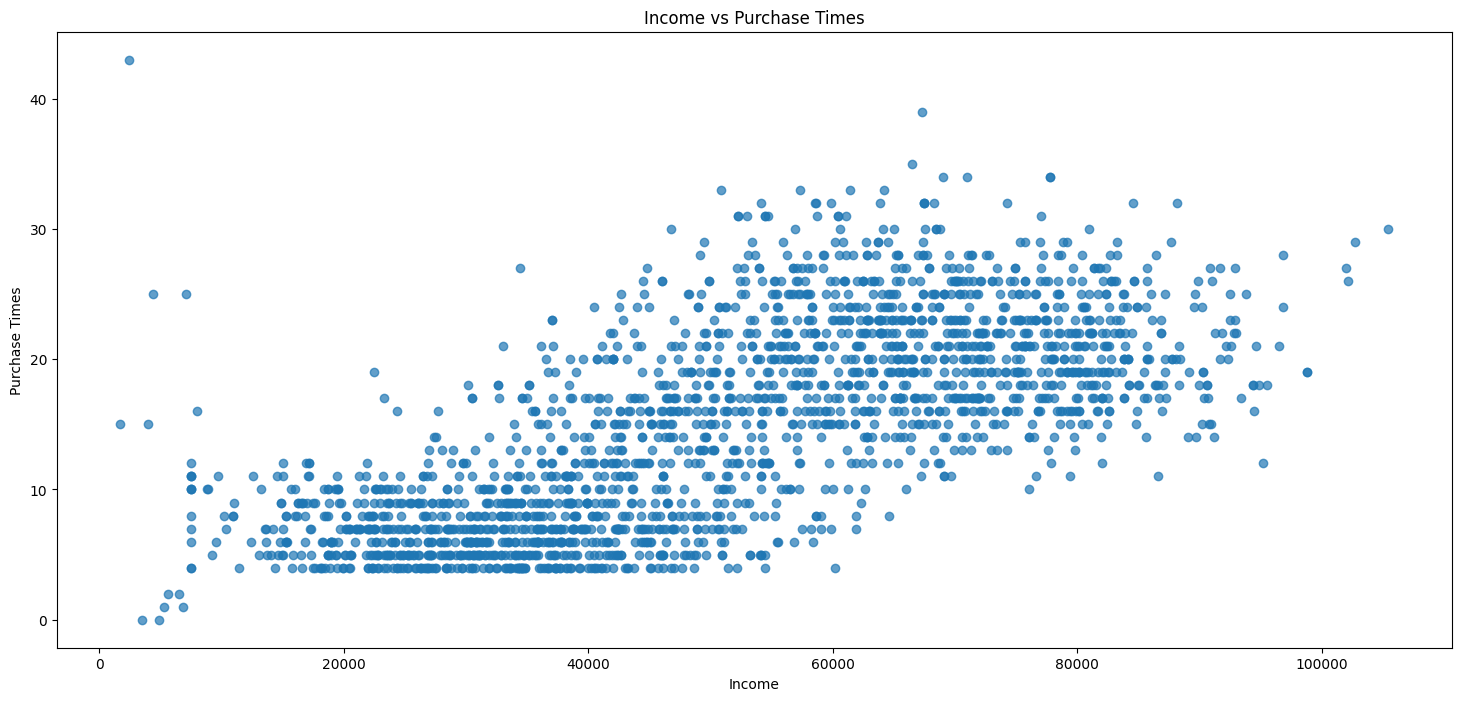

In [14]:
plt.figure(figsize=(18, 8))

plt.scatter(X['Income'], X['Purchases_Number'], alpha=0.7)
plt.title('Income vs Purchase Times')
plt.xlabel('Income')
plt.ylabel('Purchase Times')
plt.show()

## KMeans Clustering

In [ ]:
# Categorise customers into 3 segments
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=17)
labels = kmeans.fit_predict(X)

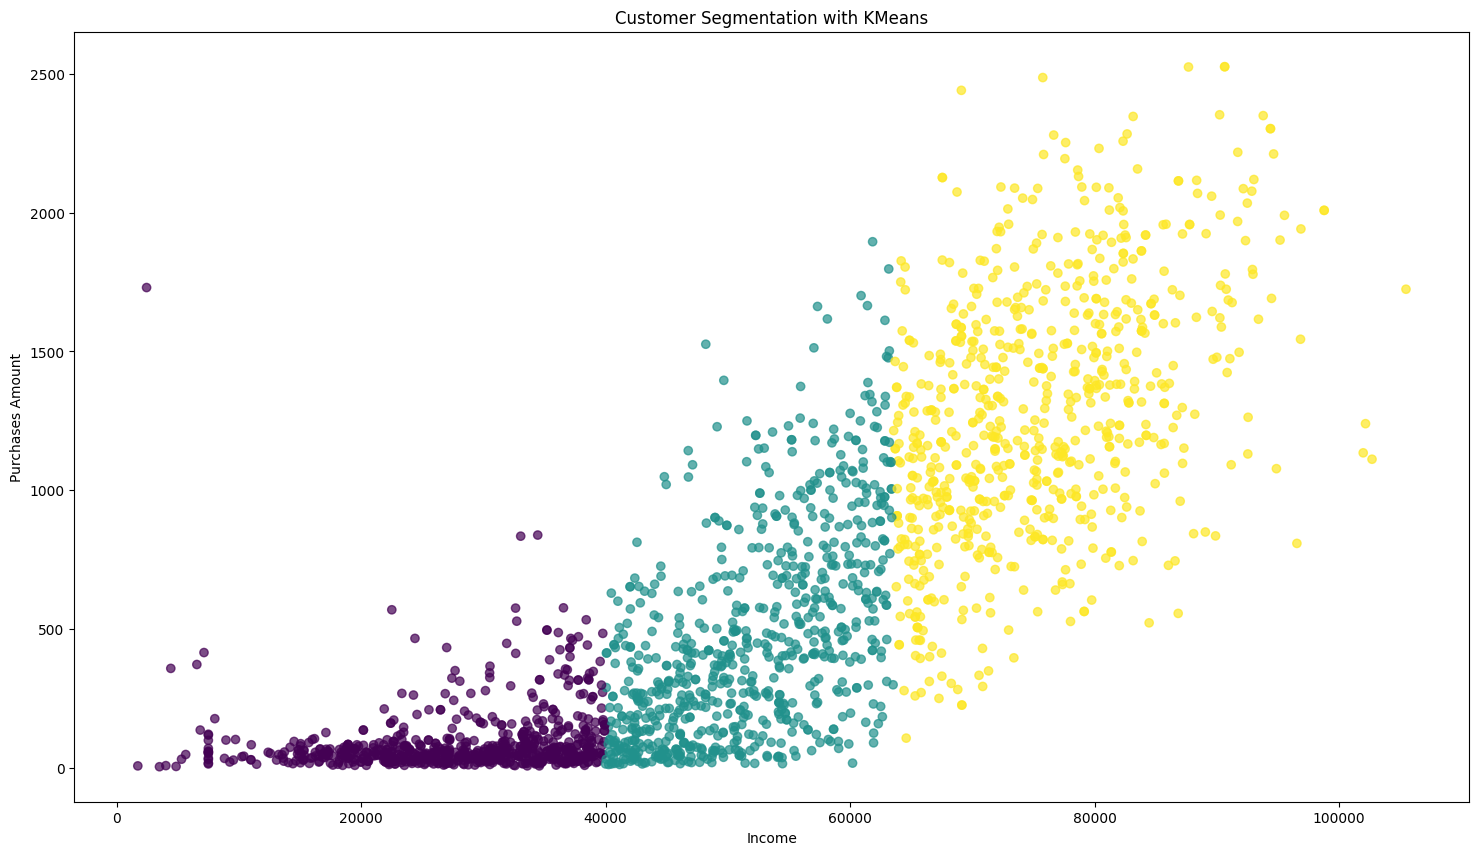

In [ ]:
# Visualize the customer segments based on income and purchases
plt.figure(figsize=(18, 10))
scatter = plt.scatter(X['Income'], X['Purchases_Amount'], c=labels, cmap='viridis', alpha=0.7)

plt.title('Customer Segmentation with KMeans')
plt.xlabel('Income')
plt.ylabel('Purchases Amount')

plt.show()

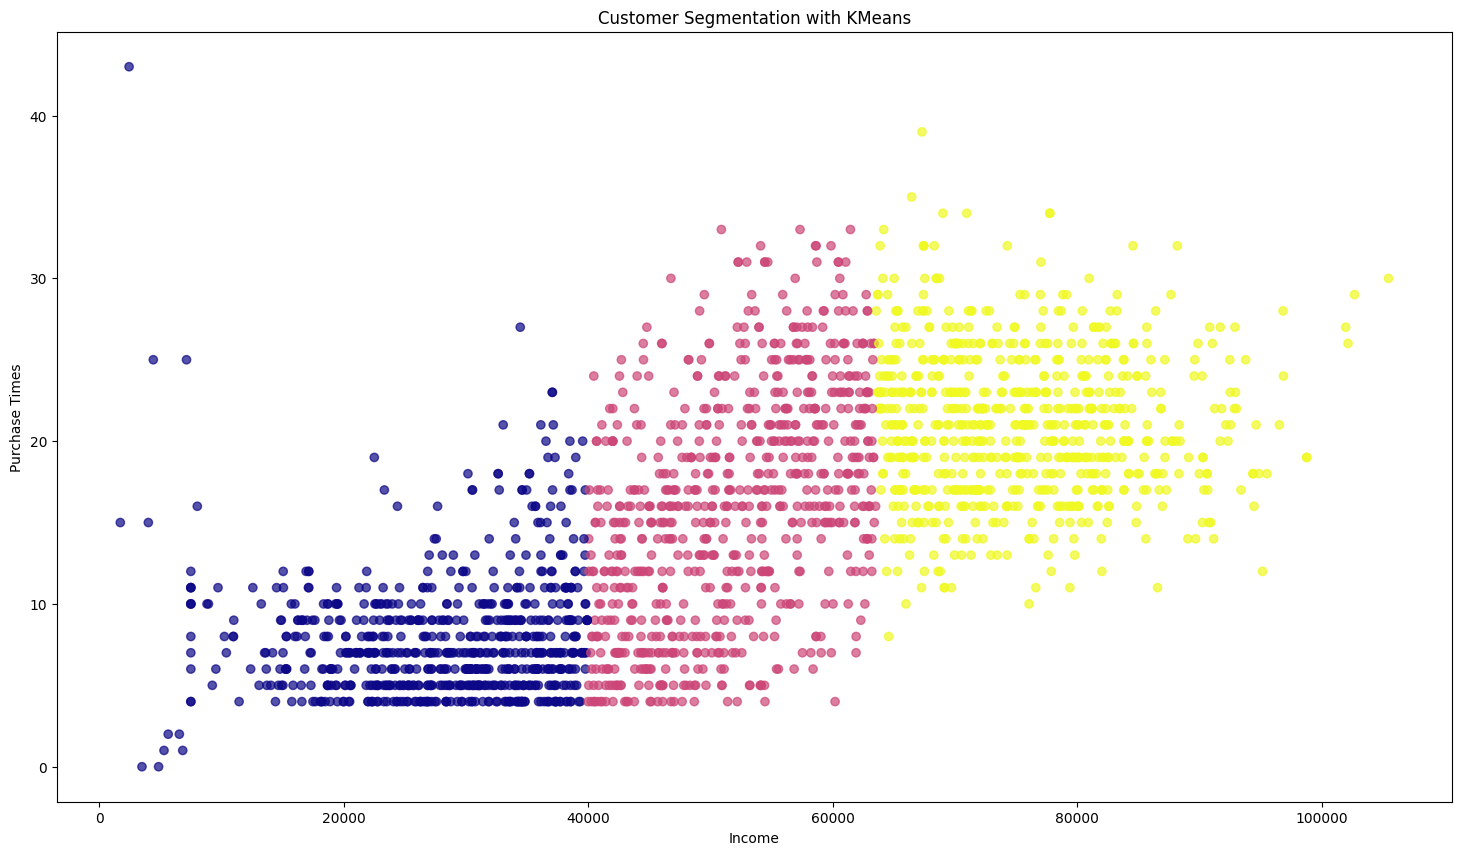

In [20]:
plt.figure(figsize=(18, 10))
scatter = plt.scatter(X['Income'], X['Purchases_Number'], c=labels, cmap='plasma', alpha=0.7)

plt.title('Customer Segmentation with KMeans')
plt.xlabel('Income')
plt.ylabel('Purchase Times')

plt.show()

### Customer Segments Description

Based on the clustering analysis, the customers can be categorized into the following three segments:

- **Segment 0 - Premium Customers: High Income, High Purchases**
    - Customers in this segment have high income levels and make significant purchases across various product categories.
    - They are likely to be loyal and valuable customers who contribute significantly to revenue.

- **Segment 1 - Valuable Customers: Moderate Income, Moderate Purchases**
    - This segment consists of customers with moderate income levels and average purchasing behavior.
    - They represent a balanced group that may respond well to targeted marketing campaigns.

- **Segment 2 - Budget Customers: Low Income, Low Purchases**
    - Customers in this segment have lower income levels and make fewer purchases.
    - They may require budget-friendly offers or incentives to increase engagement and spending.

WCSS based on Cluster Size

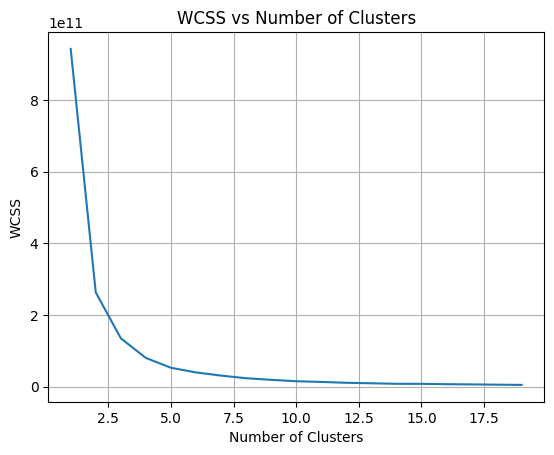

In [22]:
# Calculate and visualise the Within-Cluster Sum of Squares (WCSS) for various numbers of clusters
wcss = []

for k in range(1, 20):
    tmp_model = KMeans(n_clusters=k, init='k-means++', random_state=17)
    tmp_model.fit(X)
    wcss.append(tmp_model.inertia_)

plt.plot(range(1,20), wcss)
plt.title('WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

## Agglomerative Clustering

Agglomerative Clustering is a type of hierarchical clustering algorithm that builds nested clusters by progressively merging data points or groups of points based on their similarity. Starting with each data point as its own cluster, the algorithm repeatedly combines the two closest clusters until all points are grouped into a single cluster or a specified number of clusters is reached. The closeness between clusters is typically measured using linkage criteria such as single, complete, average, or ward linkage. Agglomerative clustering does not require specifying the number of clusters in advance and is especially useful for revealing the hierarchical structure in data, which can be visualized using a dendrogram.

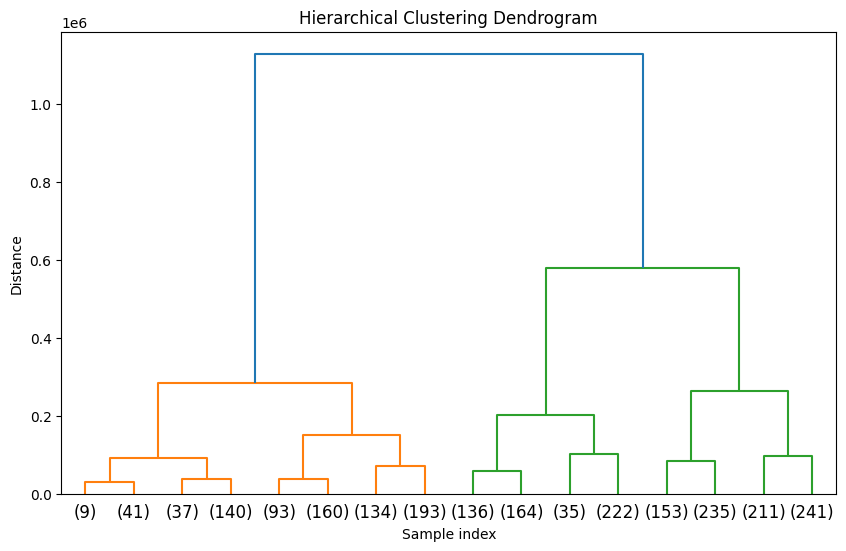

In [25]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(X)
labels = model.labels_

linkage_matrix = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()